# Python For Data Analysis : Final Project
## spambase dataset : Adam DBZ, Maxime JULLIEN, Othman SEQQAT

## Importing dataset

In [39]:
import pandas as pd
import numpy as np

with open('spambase/spambase.names','r') as f:
    features = []
    for line in f.readlines()[33:]:
        features.append(line.split(':')[0])
    features.append('spam')
    f.close()

spambase_df = pd.read_csv('spambase/spambase.data', names=features)

* #### lets take a look on our Data Frame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
spambase_df.head(3)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


In [13]:
print(f"Shape of the original spambase Data Frame : {spambase_df.shape}")

Shape of the original spambase Data Frame : (4601, 58)


* Lets see how much spams are on this dataset

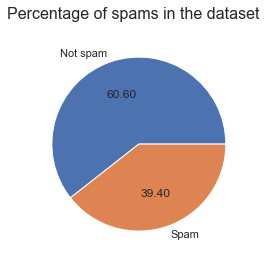

In [54]:
spam_prctg_df = spambase_df.spam.value_counts(normalize=True).to_frame()

plt.figure()
plt.pie(spam_prctg_df, labels=['Not spam', 'Spam'], autopct='%.2f')
plt.suptitle("Percentage of spams in the dataset", fontsize=16)

plt.show()

* lets see the columns type

In [10]:
spambase_df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

* Lets verify if there is any null values

In [11]:
spambase_df.isnull().values.any()

False

* Lets have some informations on our features  

In [12]:
spambase_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


* Correlation matrix

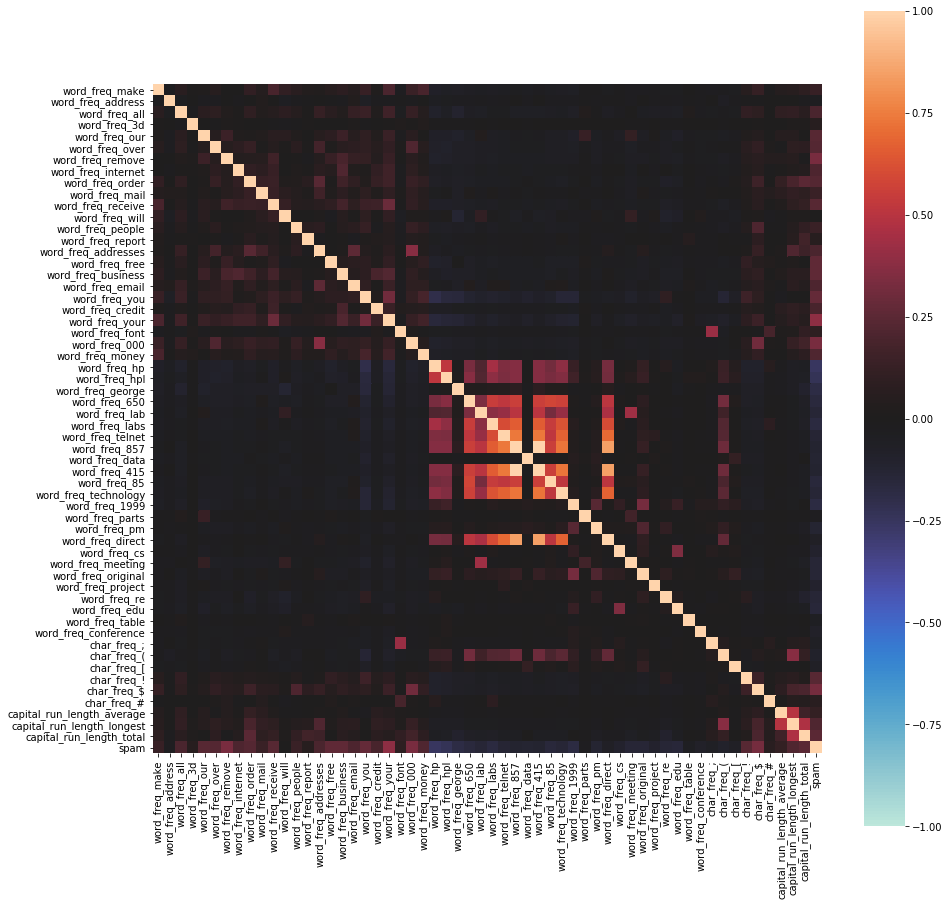

In [28]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(spambase_df.corr(), cmap ="icefire", vmin=-1, square=True,)

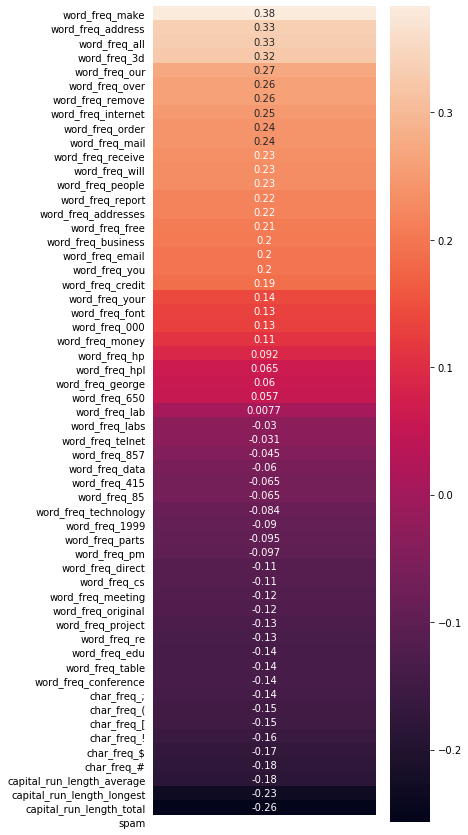

In [34]:

fig = plt.figure(figsize=(5,15))
corr_spam = spambase_df.corr().spam.sort_values(ascending=False)
corr_spam.drop('spam',inplace=True)
ax = sns.heatmap(corr_spam.values.reshape((-1,1)), cmap ='rocket', annot=True, 
                 xticklabels=False, yticklabels=spambase_df.corr().index)
ax.tick_params(left=False)

* lets plot the frequency of special characters in a spam mail

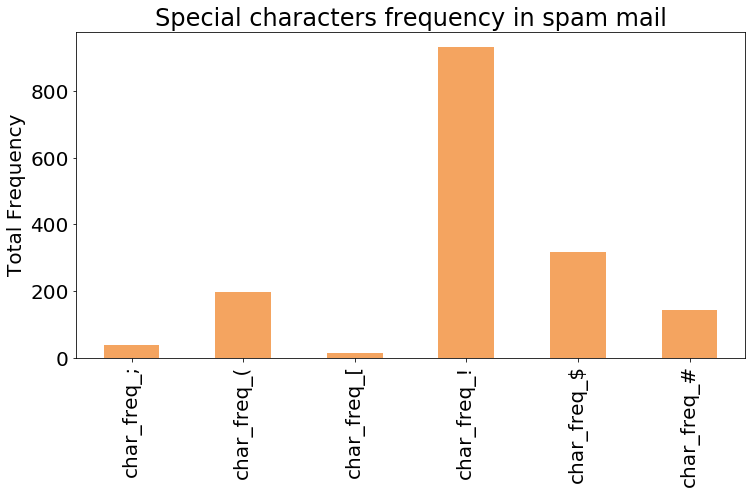

In [47]:
fig = plt.figure(figsize=(12,6))
spambase_df[spambase_df['spam']==1].iloc[:,48:54].sum().plot(kind='bar', color='sandybrown')
plt.title("Special characters frequency in spam mail")
x_ticks_label =[x for x in spambase_df.columns[48:54]]
plt.ylabel('Total Frequency')
plt.xticks(np.arange(54-48),x_ticks_label)
plt.show()

* lets plot the frequency of special characters in a safe mail

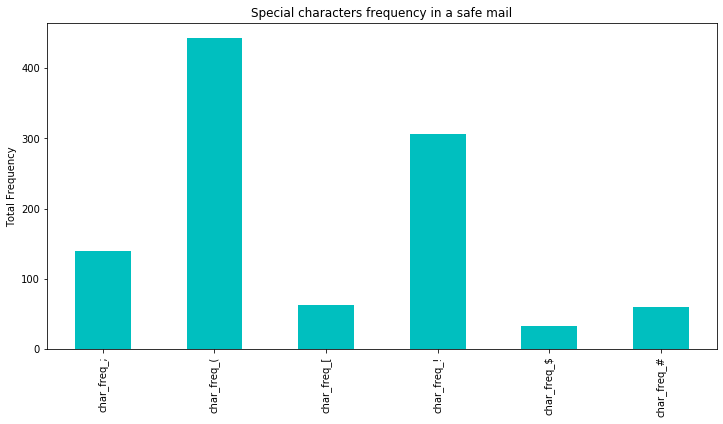

In [43]:
fig = plt.figure(figsize=(12,6))
spambase_df[spambase_df['spam']==0].iloc[:,48:54].sum().plot(kind='bar', color='c')
plt.title("Special characters frequency in a safe mail")
x_ticks_label =[x for x in spambase_df.columns[48:54]]
plt.ylabel('Total Frequency')
plt.xticks(np.arange(54-48),x_ticks_label)
plt.show()

## Setting up a train dataset and a test dataset

In [3]:
from sklearn.model_selection import train_test_split

X = spambase_df.iloc[:,:-1]     # Removing the spam column from the original dataset
Y = spambase_df.spam            # choosing only the spam column from the dataset

# Splitting : we're train with 75% and keep 25% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

print(f"Shape of the train data values : {X_train.shape}")
print(f"Shape of the test data values : {X_test.shape}\n")

print(f"Shape of the train label values : {Y_train.shape}")
print(f"Shape of the test label values :  {Y_test.shape}")

Shape of the train data values : (3450, 57)
Shape of the test data values : (1151, 57)

Shape of the train label values : (3450,)
Shape of the test label values :  (1151,)


## Machine Learning models:
We are going to use these models:
* ### Linear Discriminant Analysis
* ### Logistic Regression
* ### Gradient Boosting Classifier
* ### Random Forest Classifier

* Lets import the models from scikit-learn 

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [6]:
# Please set the number of decimals you want in your scores
p = 5

* Lets fit the models
### Linear Discriminant Analysis

In [7]:
lda = LDA(n_components=1)

lda.fit_transform(X_train, Y_train)
lda.transform(X_test)

print(f"The Linear Discriminant Analysis score on train dataset : {round(lda.score(X_train, Y_train), p)}")
print(f"The Linear Discriminant Analysis score on test dataset : {round(lda.score(X_test, Y_test), p)}")


The Linear Discriminant Analysis score on train dataset : 0.89681
The Linear Discriminant Analysis score on test dataset : 0.88705


### Logistic Regression

In [8]:
logReg = LogisticRegression(max_iter= 3000, random_state=10)
logReg.fit(X_train, Y_train)

print(f"The Logistic Regression score on train dataset : {round(logReg.score(X_train, Y_train), p)}")
print(f"The Logistic Regression score on test dataset : {round(logReg.score(X_test, Y_test), p)}")

The Logistic Regression score on train dataset : 0.93391
The Logistic Regression score on test dataset : 0.91573


### Gradient Boosting Classifier

In [9]:
gradBoost = GradientBoostingClassifier(random_state=10)
gradBoost.fit(X_train, Y_train)

print(f"The Gradient Boosting Classifier on train dataset : {round(gradBoost.score(X_train, Y_train), p)}")
print(f"The Gradient Boosting Classifier on test dataset : {round(gradBoost.score(X_test, Y_test), p)}")

The Gradient Boosting Classifier on train dataset : 0.9658
The Gradient Boosting Classifier on test dataset : 0.93397


### Random Forest Classifier

In [10]:
randForest = RandomForestClassifier(random_state=10)
randForest.fit(X_train, Y_train)

print(f"The Random Forest Classifier on train dataset : {round(randForest.score(X_train, Y_train), p)}")
print(f"The Random Forest Classifier on test dataset : {round(randForest.score(X_test, Y_test), p)}")

The Random Forest Classifier on train dataset : 0.99942
The Random Forest Classifier on test dataset : 0.94005


* #### Lets create a dictionnary for these models

In [11]:
models = {"lda": {"name" : "Linear Discriminant Analysis", "model": lda, "test_score": round(lda.score(X_test, Y_test), p)},
"logReg": {"name" : "Logistic Regression","model": logReg, "test_score": round(logReg.score(X_test, Y_test), p)},
"gradBoost": {"name" : "Gradient Boosting Classifier","model": gradBoost, "test_score": round(gradBoost.score(X_test, Y_test), p)},
"randForest": {"name" : "Random Forest Classifier","model": randForest, "test_score": round(randForest.score(X_test, Y_test), p)}}

### Comparing these Machine Learning models on this dataset 

* #### We make a prediction for each model from the previous ones, then we find out it's precision

In [12]:
# Importing the accuracy and the precision functions
from sklearn.metrics import accuracy_score, precision_score

In [13]:
for model in models:
    Y_pred = eval(model).predict(X_test)
    models[model].update({'accuracy': round(accuracy_score(Y_test, Y_pred), p)})
    models[model].update({'precision': round(precision_score(Y_test, Y_pred), p)})

* #### Lets print the scores for each model to make comparisons between them

In [14]:
comparison_df = pd.DataFrame(data=zip([models[model]['name'] for model in models],
 [models[model]['accuracy'] for model in models],
 [models[model]['precision'] for model in models]),
 columns=['model', 'accuracy', 'precision'])

comparison_df.sort_values(by=['precision'], ascending=False)

,model,accuracy,precision
3,Random Forest Classifier,0.94005,0.93917
2,Gradient Boosting Classifier,0.93397,0.92344
1,Logistic Regression,0.91573,0.90511
0,Linear Discriminant Analysis,0.88705,0.90107


We can see the most precise model from what we did is the : Random Forest Classifier

Lets do some tunning to improve the random forest prediction. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, randForest.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot(cmap='Blues')

## Exporting our model

In [87]:
import joblib

filename = "randForest.pkl"
joblib.dump(randForest, filename)

['randForest.pkl']